<a href="https://colab.research.google.com/github/ali-talebi/project_industrial/blob/main/Detect%20Defect%20object%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creator : Ali Talebi 
Email : Alitalebishahroodi@gmail.com
## Project : Detect Defect on Object [ Classification problem ( 2 classes ) ] with Deep learning ( CNN + MLP ] 

### Resource of Data set is : Kaggle Website 

In [1]:
!unzip "/content/drive/MyDrive/Master Courses /Term2/project/archive (1).zip"

Streaming output truncated to the last 5000 lines.
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5259.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_526.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5260.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5262.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5265.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_527.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5270.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5272.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5274.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_528.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5282.jpeg  
  inflating: casting_data/casting_data/train/def_front/cast_def_0_5283.jpeg  
  inflating: cas

In [22]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np 
import os 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
import time 
import tensorflow 
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense  , Dropout , BatchNormalization , Conv2D , Flatten , MaxPool2D 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam 

In [3]:
Total_img = []
Total_label = []

In [4]:
for i in os.listdir("/content/casting_data/casting_data/train")  : 
  for j in os.listdir(f"/content/casting_data/casting_data/train/{i}"):
    img = cv2.imread(f"/content/casting_data/casting_data/train/{i}/{j}")
    img = cv2.resize(img , (200 , 200) )
    Total_img.append(img)
    Total_label.append(i)







Would You like to see a picture and label : [y/n] y
please enter a number for show image : 123


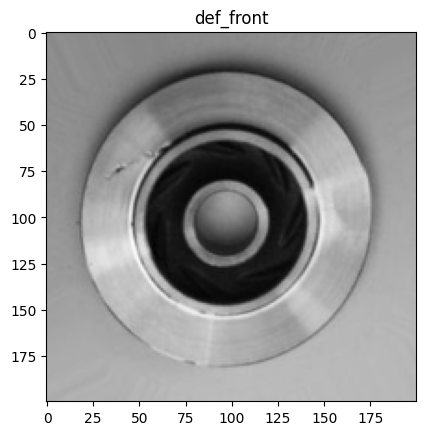

Would You like to see a picture and label : [y/n] n


In [5]:
while 1 : 
  response = input("Would You like to see a picture and label : [y/n] " )
  if response == "y" : 
    vorodi = int(input("please enter a number for show image : "  ) )
    plt.imshow(Total_img[vorodi])
    plt.title(Total_label[vorodi])
    
  else : 

    break 

  plt.show()
  time.sleep(3) 


In [6]:
Total_img = []
Total_label = []

for i in os.listdir("/content/casting_data/casting_data/train")  : 
  for j in os.listdir(f"/content/casting_data/casting_data/train/{i}"):
    img = cv2.imread(f"/content/casting_data/casting_data/train/{i}/{j}")
    img = cv2.resize(img , (100 , 100) )
    Total_img.append(img)
    Total_label.append(i)







In [7]:
len(Total_img)

6633

In [8]:
len(Total_label)

6633

In [9]:
Total_img = np.array(Total_img , dtype = "float" ) / 255.0 
Total_label = np.array(Total_label)

In [10]:
Total_img.shape 

(6633, 100, 100, 3)

In [11]:
Total_label.shape 

(6633,)

In [12]:
Total_label = Total_label.reshape(-1 , 1 ) 

In [13]:
Total_label.shape 

(6633, 1)

In [14]:
x_train , x_test , y_train , y_test = train_test_split(Total_img , Total_label , test_size = 0.2 , random_state = 42 , shuffle = True ) 

In [15]:
Total_label

array([['def_front'],
       ['def_front'],
       ['def_front'],
       ...,
       ['ok_front'],
       ['ok_front'],
       ['ok_front']], dtype='<U9')

In [16]:
obj_label_coder = LabelEncoder()
y_train = obj_label_coder.fit_transform(y_train)
y_test = obj_label_coder.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [17]:
y_train

array([1, 1, 1, ..., 1, 1, 0])

In [18]:
y_train = to_categorical(y_train , 2 ) 
y_test  = to_categorical(y_test  , 2 ) 

In [33]:
My_model = Sequential([
    Conv2D(128 , (3,3) , activation = "relu" , input_shape = x_train.shape[1:]  ) , 
    Dropout(0.2) ,
    BatchNormalization() , 
    Conv2D(80 , (3,3) , activation = "relu" ,  ) , 
    Dropout(0.2) ,
    BatchNormalization() ,
    MaxPool2D() , 



    Conv2D(50 , (3,3) , activation = "relu"   ) , 
    Dropout(0.2) ,
    BatchNormalization() , 
    Conv2D(40 , (3,3) , activation = "relu"   ) , 
    Dropout(0.2) ,
    BatchNormalization() ,
    MaxPool2D() , 



    Conv2D(30 , (3,3) , activation = "relu"   ) , 
    BatchNormalization() , 
    Conv2D(20 , (3,3) , activation = "relu"   ) , 
    BatchNormalization() ,
    MaxPool2D() , 
    Flatten() , 

    Dense(128 , activation = "relu" ) , 
    BatchNormalization() ,
    Dropout(0.2) , 
    Dense(50 , activation = "relu" ) ,
    BatchNormalization() , 
    Dropout(0.2) , 

    Dense(30 , activation = "relu" ) ,
    BatchNormalization() , 
    Dropout(0.2) , 

    Dense(20 , activation = "relu" ) ,
    BatchNormalization() , 
    Dropout(0.2) , 


    Dense(10 , activation = "relu" ) , 
    
    Dense(2 , activation = "softmax" ) , 

])

In [34]:
opti = Adam(learning_rate = 0.01 , ) 

In [35]:
My_model.compile(opti , loss = "categorical_crossentropy" , metrics = ["acc"] ) 

In [36]:
ali = My_model.fit(x_train , y_train , epochs = 50  , batch_size = 100 , validation_data = (x_test , y_test )  )

Epoch 1/50
54/54 [==============================] - 27s 354ms/step - loss: 0.3495 - acc: 0.8353 - val_loss: 664.7194 - val_acc: 0.4137
Epoch 2/50
54/54 [==============================] - 18s 330ms/step - loss: 0.1688 - acc: 0.9350 - val_loss: 50.1047 - val_acc: 0.4137
Epoch 3/50
54/54 [==============================] - 18s 339ms/step - loss: 0.1654 - acc: 0.9395 - val_loss: 15.8279 - val_acc: 0.4137
Epoch 4/50
54/54 [==============================] - 18s 342ms/step - loss: 0.1197 - acc: 0.9484 - val_loss: 1.8740 - val_acc: 0.7332
Epoch 5/50
54/54 [==============================] - 18s 331ms/step - loss: 0.1357 - acc: 0.9489 - val_loss: 3.6452 - val_acc: 0.5403
Epoch 6/50
54/54 [==============================] - 18s 331ms/step - loss: 0.0608 - acc: 0.9772 - val_loss: 3.6776 - val_acc: 0.5946
Epoch 7/50
54/54 [==============================] - 18s 333ms/step - loss: 0.0692 - acc: 0.9742 - val_loss: 5.0564 - val_acc: 0.5863
Epoch 8/50
54/54 [==============================] - 18s 331ms/ste

In [37]:
My_model.evaluate(x_test , y_test ) 

42/42 [==============================] - 2s 31ms/step - loss: 1.1502 - acc: 0.7159


[1.150217890739441, 0.7159005403518677]

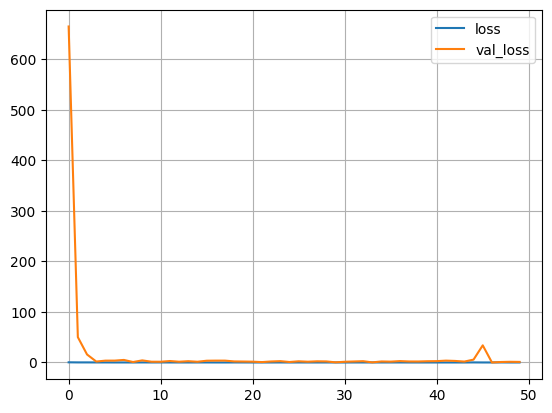

In [38]:
plt.plot(range(50) , ali.history["loss"] , label = "loss" ) 
plt.plot(range(50) , ali.history["val_loss"] , label = "val_loss" ) 
plt.legend()
plt.grid()
plt.show()


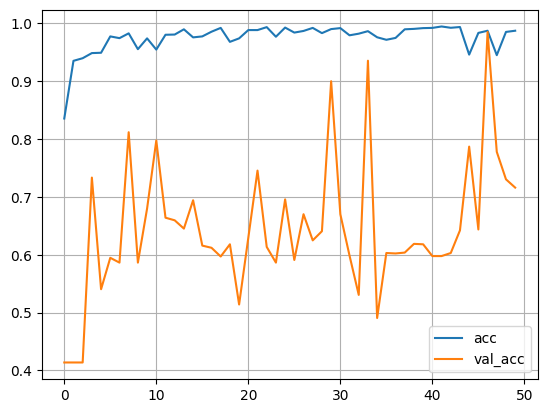

In [39]:
plt.plot(range(50) , ali.history["acc"] , label = "acc" ) 
plt.plot(range(50) , ali.history["val_acc"] , label = "val_acc" ) 
plt.legend()
plt.grid()
plt.show()

In [40]:
y_predict = My_model.predict(x_test)

42/42 [==============================] - 43s 19ms/step


In [41]:
result2 = []
for i in y_predict : 
  result = np.argmax(i)
  result2.append(result)

Would you like to see picture : [y/n] y
Would You like to see which picture 985
Label predict is :  ['def_front']
Label original  is :  ['def_front']


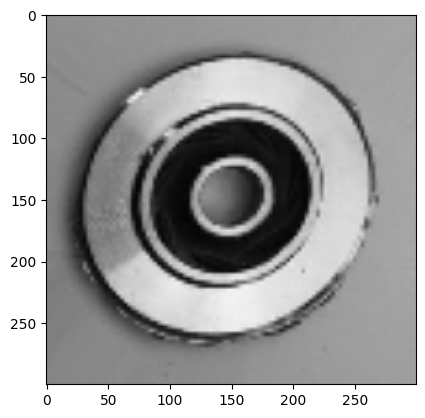

Would you like to see picture : [y/n] y
Would You like to see which picture 1265
Label predict is :  ['ok_front']
Label original  is :  ['ok_front']


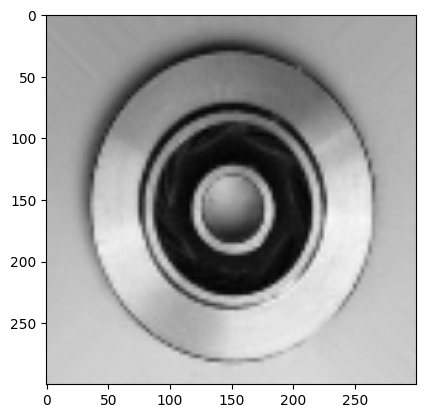

Would you like to see picture : [y/n] y
Would You like to see which picture 796
Label predict is :  ['def_front']
Label original  is :  ['def_front']


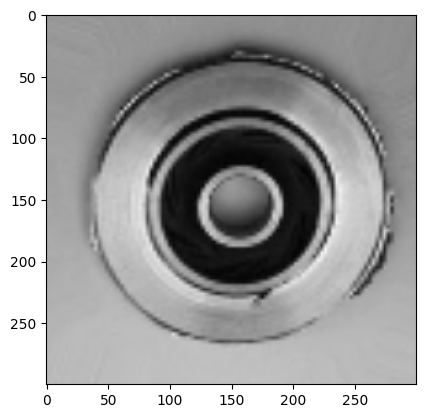

Would you like to see picture : [y/n] y
Would You like to see which picture 3269


IndexError: ignored

In [47]:
while 1 : 
  response = input("Would you like to see picture : [y/n] " )
  if response == "y" : 
    vorodi = int(input("Would You like to see which picture "))
    plt.imshow(cv2.resize(x_test[vorodi] , (300 , 300 ) ))
    print("Label predict is : " , obj_label_coder.inverse_transform([result2[vorodi]]) )
    print("Label original  is : " , obj_label_coder.inverse_transform([np.argmax(y_test[vorodi])]) )

  else : 
    break 

  plt.show()

  time.sleep(3)